In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('..\train.csv')
test_data = pd.read_csv('..\test.csv')

In [3]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
missing = train_data.isnull().sum()[train_data.isnull().sum() > 0].sort_values(ascending=False)
missing

Credit_History      50
Self_Employed       32
LoanAmount          22
Dependents          15
Loan_Amount_Term    14
Gender              13
Married              3
dtype: int64

In [6]:
train_data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [7]:
train_data['Loan_Amount_Term']

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
609    360.0
610    180.0
611    360.0
612    360.0
613    360.0
Name: Loan_Amount_Term, Length: 614, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000294409D9E48>,
      dtype=object)

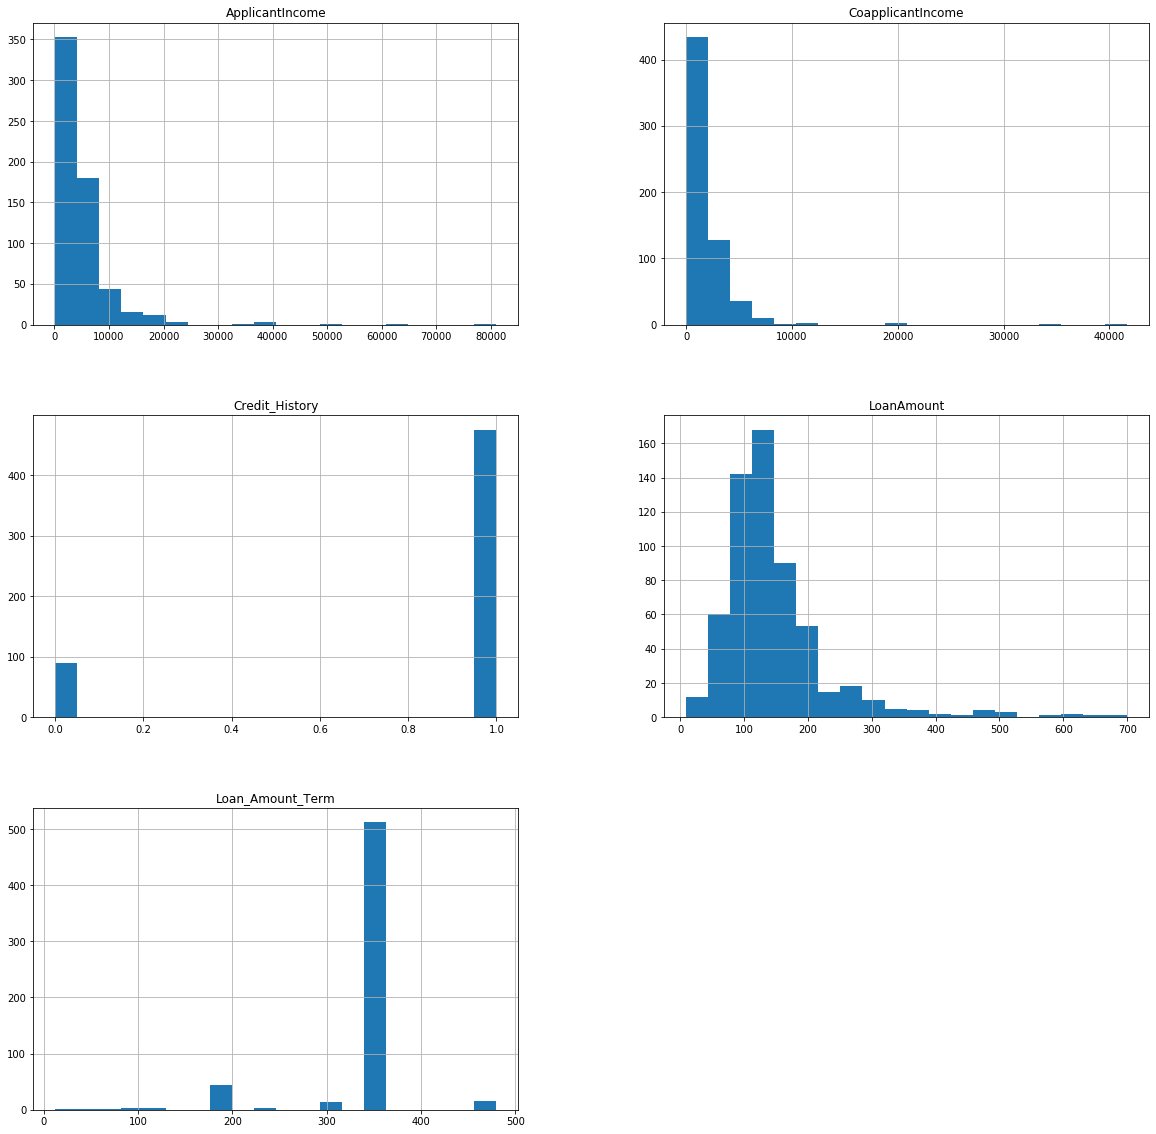

In [8]:
train_data.hist(figsize=(20,20),bins=20)

In [9]:
missing

Credit_History      50
Self_Employed       32
LoanAmount          22
Dependents          15
Loan_Amount_Term    14
Gender              13
Married              3
dtype: int64

In [10]:
train_data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [11]:
train_data['Credit_History'] = train_data['Credit_History'].fillna(1.0)

In [12]:
train_data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [13]:
test_id = test_data.pop('Loan_ID')
train_id = train_data.pop('Loan_ID')

n_train = train_data.shape[0]
labels = train_data.pop('Loan_Status')

In [14]:
df = pd.concat([train_data,test_data])
missing = pd.DataFrame({'Amount':df.isnull().sum() , 'Percent' : (df.isnull().sum() / len(df))*100}).sort_values(by='Percent',ascending=False)
missing[missing['Amount'] > 0]

,Amount,Percent
Self_Employed,55,5.606524
Credit_History,29,2.956167
LoanAmount,27,2.752294
Dependents,25,2.548420
Gender,24,2.446483
Loan_Amount_Term,20,2.038736
Married,3,0.305810


In [15]:
for column in ('Self_Employed', 'Credit_History', 'LoanAmount', 'Dependents', 'Gender','Loan_Amount_Term','Married'):
    df[column] = df[column].fillna(df[column].mode().iloc[0])

In [16]:
df['Credit_History'].isnull().sum()

0

In [17]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [18]:
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [19]:
pd.DataFrame({'Amount': df.isnull().sum(),
              'Percent': (df.isnull().sum() / len(df)) *100}).sort_values(by='Percent', ascending=False)

,Amount,Percent
Gender,0,0.0
Married,0,0.0
Dependents,0,0.0
Education,0,0.0
Self_Employed,0,0.0
ApplicantIncome,0,0.0
CoapplicantIncome,0,0.0
LoanAmount,0,0.0
Loan_Amount_Term,0,0.0
Credit_History,0,0.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             981 non-null    object 
 1   Married            981 non-null    object 
 2   Dependents         981 non-null    object 
 3   Education          981 non-null    object 
 4   Self_Employed      981 non-null    object 
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         981 non-null    float64
 8   Loan_Amount_Term   981 non-null    float64
 9   Credit_History     981 non-null    float64
 10  Property_Area      981 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 92.0+ KB


In [21]:
categorical_features = [x for x in df.select_dtypes(include=np.object).columns]

for feat in categorical_features:
    dummies = pd.get_dummies(df[feat], prefix='{0}'.format(feat), drop_first=True)
    df = pd.concat([df, dummies], axis=1)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   981 non-null    object 
 1   Married                  981 non-null    object 
 2   Dependents               981 non-null    object 
 3   Education                981 non-null    object 
 4   Self_Employed            981 non-null    object 
 5   ApplicantIncome          981 non-null    int64  
 6   CoapplicantIncome        981 non-null    float64
 7   LoanAmount               981 non-null    float64
 8   Loan_Amount_Term         981 non-null    float64
 9   Credit_History           981 non-null    float64
 10  Property_Area            981 non-null    object 
 11  Gender_Male              981 non-null    uint8  
 12  Married_Yes              981 non-null    uint8  
 13  Dependents_1             981 non-null    uint8  
 14  Dependents_2             9

In [23]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,1,0,0,0,0,0,0,0,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,1,1,1,0,0,0,0,0,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,1,0,0,0,0,1,0,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,1,0,0,0,1,0,0,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,0,0,0,0,0,0,0,1


In [24]:
train_set = df[:n_train]
test_set = df[n_train:]

In [25]:
train_set.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,1,0,0,0,0,0,0,0,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,1,1,1,0,0,0,0,0,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,1,0,0,0,0,1,0,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,1,0,0,0,1,0,0,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,0,0,0,0,0,0,0,1


In [26]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [27]:

LogReg_model = LogisticRegression()
RandomForestClassifier_model = RandomForestClassifier()
DecisionTreeClassifier_model = DecisionTreeClassifier()
KNeighborsClassifier_model = KNeighborsClassifier()
SVC_model = SVC()
GaussianNB_model = GaussianNB()

models = {
         'LogReg_model': LogReg_model,
         'RandomForestClassifier_model': RandomForestClassifier_model,
         'KNeighborsClassifier_model': KNeighborsClassifier_model,
         'SVC_model': SVC_model,
         'GaussianNB_model': GaussianNB_model}

In [28]:
from sklearn.preprocessing import MinMaxScaler

X = train_set[train_set.select_dtypes(include=np.number).columns].values

# Normalise features
scalar = MinMaxScaler()
X_scaled = scalar.fit_transform(X)

In [29]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

def cross_validation(model, X, y):
    "Check model with cross validation"
    score = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    return round(np.mean(score), 4)

In [30]:
models_evaluation = {}
for model_name, model in models.items():
    models_evaluation[model_name] = cross_validation(model, X_scaled, labels)
    
pd.DataFrame(data=models_evaluation.items(), columns=['Model', 'Accuracy']).sort_values(by='Accuracy')

,Model,Accuracy
2,KNeighborsClassifier_model,0.7655
1,RandomForestClassifier_model,0.7866
4,GaussianNB_model,0.7867
0,LogReg_model,0.8095
3,SVC_model,0.8095


In [31]:
from sklearn.ensemble import VotingClassifier

In [32]:
LogReg_model.fit(X_scaled, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

[(3.39385104418816, 'Credit_History'), (0.8110680947516202, 'Property_Area_Semiurban'), (0.5191832961215835, 'Married_Yes'), (0.2484307830859229, 'Dependents_2'), (0.1831317144355489, 'Property_Area_Urban'), (0.1373393797394729, 'ApplicantIncome'), (-0.017387229868458188, 'Self_Employed_Yes'), (-0.02404540880425397, 'Dependents_3+'), (-0.03547125857738699, 'Gender_Male'), (-0.33967959489185895, 'Loan_Amount_Term'), (-0.3423717186125096, 'Education_Not Graduate'), (-0.39764300758709364, 'Dependents_1'), (-0.6227875356487679, 'LoanAmount'), (-0.8659516402347581, 'CoapplicantIncome')]
[(3.39385104418816, 'Credit_History'), (0.8110680947516202, 'Property_Area_Semiurban'), (0.5191832961215835, 'Married_Yes'), (0.2484307830859229, 'Dependents_2'), (0.1831317144355489, 'Property_Area_Urban'), (0.1373393797394729, 'ApplicantIncome'), (-0.017387229868458188, 'Self_Employed_Yes'), (-0.02404540880425397, 'Dependents_3+'), (-0.03547125857738699, 'Gender_Male'), (-0.33967959489185895, 'Loan_Amount_

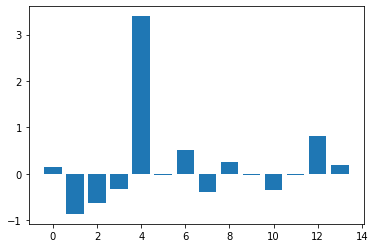

In [33]:
importance = LogReg_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    
    features_list = sorted(zip(importance, train_set.select_dtypes(include=np.number).columns),reverse=True)
    print(features_list)
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [34]:
imp_feats = [feat for (n, feat) in features_list if n > 0.01]
print(imp_feats)

['Credit_History', 'Property_Area_Semiurban', 'Married_Yes', 'Dependents_2', 'Property_Area_Urban', 'ApplicantIncome']


In [35]:
X = train_set[imp_feats].values
X_scaled = scalar.fit_transform(X)

In [36]:
cross_validation(LogReg_model,X_scaled,labels)

0.8095

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

grid = { 'penalty' : ['l1', 'l2'],
        'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
        'C' : [100, 10, 1.0, 0.1, 0.01]}

model = LogisticRegression()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

best_LR = grid_search.fit(X_scaled, labels)

In [38]:
cross_validation(best_LR, X_scaled, labels)

0.8095

In [39]:
model = SVC()
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=3, scoring='accuracy',error_score=0)
best_svc = grid_search.fit(X_scaled, labels)

In [40]:
cross_validation(best_svc, X_scaled, labels)

0.8095

In [41]:
voting_clr = VotingClassifier(estimators=[('LogReg', best_LR),('svc', best_svc)])
cross_validation(voting_clr, X_scaled, labels)

0.8095

In [42]:
voting_clr.fit(X_scaled, labels)

VotingClassifier(estimators=[('LogReg',
                              GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
                                           error_score=0,
                                           estimator=LogisticRegression(C=1.0,
                                                                        class_weight=None,
                                                                        dual=False,
                                                                        fit_intercept=True,
                                                                        intercept_scaling=1,
                                                                        l1_ratio=None,
                                                                        max_iter=100,
                                                                        multi_class='auto',
                                                                        n_jobs=None,


In [43]:
X_test = test_set[imp_feats].values
X_test_scaled = scalar.transform(X_test)

y_pred = voting_clr.predict(X_test_scaled)

In [53]:
Result = pd.DataFrame({'Id' : test_id, 'Loan_paid': y_pred})

In [54]:
Result

,Id,Loan_paid
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [55]:
Result['Loan_paid'].value_counts()

Y    308
N     59
Name: Loan_paid, dtype: int64

In [56]:
Result.to_csv('Result.csv',index=False)